In [46]:
import numpy as np
#import pathlib
import pandas as pd
from sklearn.model_selection import train_test_split

In [47]:
#pathlib.Path('images_SelectPercentile20.csv'))
df = pd.read_csv('C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/images_SelectPercentile20.csv', sep=',')
df.head()

,Unnamed: 0,index,0,1,2,3,4,5,6,7,...,10026,10027,10028,10029,10030,10031,10032,10033,10034,code
0,0,1143,229,230,230,229,230,231,231,231,...,232,233,233,233,233,232,233,233,233,BA
1,1,998,234,235,235,217,234,234,234,234,...,210,216,224,227,175,174,174,175,175,BA
2,2,453,228,229,229,230,220,228,231,232,...,231,231,231,230,229,229,230,229,230,BA
3,3,1012,231,230,231,231,233,233,231,231,...,228,227,227,230,230,228,229,226,226,BA
4,4,712,233,232,232,233,232,233,233,233,...,188,186,185,187,193,196,196,198,198,BA


In [48]:
df = df.drop(['Unnamed: 0','index'], axis=1)

X = df.drop('code', axis=1)
y=df['code']
y=y.replace(['BA', 'ER', 'EO', 'IG', 'LYM','MON', 'SNE', 'PLA'], [1,2,3,4,5,6,7,8])

In [49]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_sc = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size =0.2, random_state=42)

In [5]:
X_train_4D=X_train.reshape(-1,223,15,3)
X_test_4D=X_test.reshape(-1,223,15,3)

In [50]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Activation, Input, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow import keras

n_class=8

model = Sequential()

model.add(Conv2D(filters=32,
                kernel_size=(3,3),
                padding='valid',
                activation='relu',
                input_shape=(223,15,3)))

model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Dropout(rate=0.5))

model.add(Flatten())

model.add(Dense(units=64, activation ='relu'))

model.add(Dense(units=n_class+1, activation='softmax'))

In [7]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 221, 13, 32)       896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 6, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 110, 6, 32)        0         
                                                                 
 flatten (Flatten)           (None, 21120)             0         
                                                                 
 dense (Dense)               (None, 64)                1351744   
                                                                 
 dense_1 (Dense)             (None, 9)                 585       
                                                        

In [8]:
history=model.fit(X_train_4D, y_train,
                  validation_data=(X_test_4D,y_test),
                  epochs=10)

Epoch 1/10
428/428 [==============================] - 85s 193ms/step - loss: 1.0018 - accuracy: 0.6332 - val_loss: 0.7924 - val_accuracy: 0.7218
Epoch 2/10
428/428 [==============================] - 132s 309ms/step - loss: 0.6901 - accuracy: 0.7563 - val_loss: 0.6136 - val_accuracy: 0.7868
Epoch 3/10
428/428 [==============================] - 133s 311ms/step - loss: 0.5824 - accuracy: 0.7943 - val_loss: 0.6447 - val_accuracy: 0.7669
Epoch 4/10
428/428 [==============================] - 154s 359ms/step - loss: 0.5018 - accuracy: 0.8197 - val_loss: 0.5196 - val_accuracy: 0.8210
Epoch 5/10
428/428 [==============================] - 133s 311ms/step - loss: 0.4541 - accuracy: 0.8428 - val_loss: 0.5071 - val_accuracy: 0.8245
Epoch 6/10
428/428 [==============================] - 134s 312ms/step - loss: 0.4085 - accuracy: 0.8546 - val_loss: 0.5127 - val_accuracy: 0.8111
Epoch 7/10
428/428 [==============================] - 132s 308ms/step - loss: 0.3773 - accuracy: 0.8672 - val_loss: 0.4487 - 

In [14]:
#model.save("CNN_donnes_red.h5")

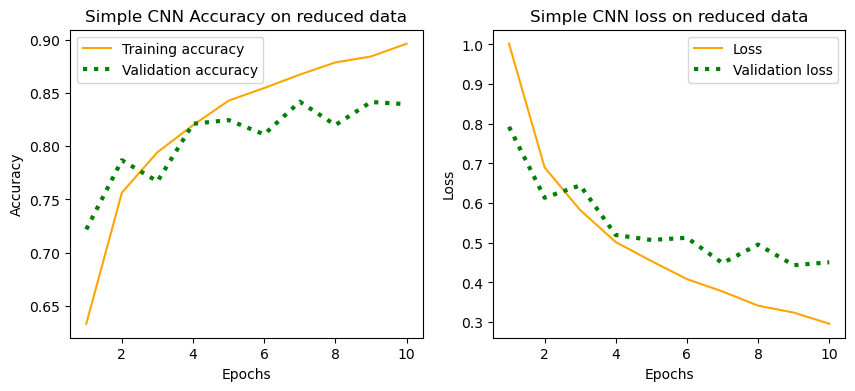

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

import matplotlib.pyplot as plt

figure = plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(np.arange(1,11,1), acc, color='orange', label='Training accuracy')
plt.plot(np.arange(1,11,1), val_acc, color='green', linestyle=':', lw=3, label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Simple CNN Accuracy on reduced data')
plt.legend()

plt.subplot(1,2,2)
plt.plot(np.arange(1,11,1), loss, color='orange', label='Loss')
plt.plot(np.arange(1,11,1), val_loss, color='green', linestyle=':', lw=3, label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Simple CNN loss on reduced data')
plt.legend()
;

#Evaluation du modèle

#model.evaluate(X_test, verbose=1, batch_size=32)

In [51]:
#Comparaison avec entraînement sans la couche de convolution, ie classification par les réseaux Dense : 
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Activation, Input, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow import keras

#inputs=Input(shape=X_train.shape[0],name='Input')
inputs=Input(shape=10035,name='Input')
dense1=Dense(units=64,activation="relu",name='Couche_1')
dense2=Dense(units=n_class+1,activation="softmax",name='Couche_2')

x=dense1(inputs)
outputs=dense2(x)

model_class = Model(inputs = inputs, outputs = outputs)
model_class.summary()


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 10035)]           0         
                                                                 
 Couche_1 (Dense)            (None, 64)                642304    
                                                                 
 Couche_2 (Dense)            (None, 9)                 585       
                                                                 
Total params: 642,889
Trainable params: 642,889
Non-trainable params: 0
_________________________________________________________________


In [52]:
model_class.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [53]:
history_class=model_class.fit(X_train, y_train,
                  validation_data=(X_test,y_test),
                  epochs=20)

Epoch 1/20
428/428 [==============================] - 14s 27ms/step - loss: 1.3051 - accuracy: 0.5384 - val_loss: 0.9891 - val_accuracy: 0.6569
Epoch 2/20
428/428 [==============================] - 9s 21ms/step - loss: 1.0383 - accuracy: 0.6318 - val_loss: 1.0180 - val_accuracy: 0.6148
Epoch 3/20
428/428 [==============================] - 13s 30ms/step - loss: 0.9628 - accuracy: 0.6582 - val_loss: 0.9509 - val_accuracy: 0.6490
Epoch 4/20
428/428 [==============================] - 17s 39ms/step - loss: 0.9316 - accuracy: 0.6661 - val_loss: 1.0618 - val_accuracy: 0.6294
Epoch 5/20
428/428 [==============================] - 14s 32ms/step - loss: 0.8918 - accuracy: 0.6798 - val_loss: 0.9294 - val_accuracy: 0.6803
Epoch 6/20
428/428 [==============================] - 13s 30ms/step - loss: 0.8923 - accuracy: 0.6767 - val_loss: 0.8853 - val_accuracy: 0.6730
Epoch 7/20
428/428 [==============================] - 12s 29ms/step - loss: 0.8703 - accuracy: 0.6836 - val_loss: 1.0476 - val_accuracy: 

In [56]:
#model_class.save("DNN1_donnes_red.h5")

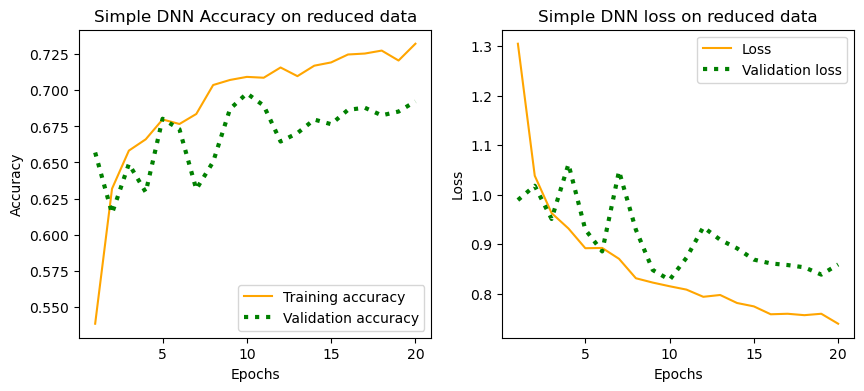

In [59]:
# Sans les convolutions, le résultat est nettement moins bon : 

acc = history_class.history['accuracy']
val_acc = history_class.history['val_accuracy']

loss = history_class.history['loss']
val_loss = history_class.history['val_loss']

import matplotlib.pyplot as plt

figure = plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(np.arange(1,21,1), acc, color='orange', label='Training accuracy')
plt.plot(np.arange(1,21,1), val_acc, color='green', linestyle=':', lw=3, label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Simple DNN Accuracy on reduced data')
plt.legend()

plt.subplot(1,2,2)
plt.plot(np.arange(1,21,1), loss, color='orange', label='Loss')
plt.plot(np.arange(1,21,1), val_loss, color='green', linestyle=':', lw=3, label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Simple DNN loss on reduced data')
plt.legend()
;

In [61]:
#Comparaison avec entraînement sans la couche de convolution mais quelques couches supplémentaires : 
from tensorflow.keras.layers import Input,Dense

#inputs=Input(shape=X_train.shape[0],name='Input')
inputs=Input(shape=10035,name='Input')
dense1=Dense(units=128,activation="relu",name='Couche_1')
couche2=Dropout(rate=0.5,name='Couche_2')
dense3=Dense(units=64,activation="relu",name='Couche_3')
dense4=Dense(units=n_class+1,activation="softmax",name='Couche_4')

x=dense1(inputs)
x=couche2(x)
x=dense3(x)
outputs=dense4(x)

model_class2 = Model(inputs = inputs, outputs = outputs)
model_class2.summary()


Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 10035)]           0         
                                                                 
 Couche_1 (Dense)            (None, 128)               1284608   
                                                                 
 Couche_2 (Dropout)          (None, 128)               0         
                                                                 
 Couche_3 (Dense)            (None, 64)                8256      
                                                                 
 Couche_4 (Dense)            (None, 9)                 585       
                                                                 
Total params: 1,293,449
Trainable params: 1,293,449
Non-trainable params: 0
_________________________________________________________________


In [62]:
model_class2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history_class2=model_class.fit(X_train, y_train,
                  validation_data=(X_test,y_test),
                  epochs=20)

Epoch 1/20
428/428 [==============================] - 11s 26ms/step - loss: 0.7089 - accuracy: 0.7455 - val_loss: 0.9131 - val_accuracy: 0.6721
Epoch 2/20
428/428 [==============================] - 9s 21ms/step - loss: 0.7041 - accuracy: 0.7389 - val_loss: 0.8177 - val_accuracy: 0.7034
Epoch 3/20
428/428 [==============================] - 11s 26ms/step - loss: 0.6990 - accuracy: 0.7461 - val_loss: 0.8566 - val_accuracy: 0.6751
Epoch 4/20
428/428 [==============================] - 12s 28ms/step - loss: 0.6903 - accuracy: 0.7495 - val_loss: 0.8588 - val_accuracy: 0.6780
Epoch 5/20
428/428 [==============================] - 11s 26ms/step - loss: 0.7009 - accuracy: 0.7458 - val_loss: 0.8463 - val_accuracy: 0.6999
Epoch 6/20
428/428 [==============================] - 12s 28ms/step - loss: 0.6863 - accuracy: 0.7472 - val_loss: 0.8470 - val_accuracy: 0.6973
Epoch 7/20
428/428 [==============================] - 11s 25ms/step - loss: 0.6834 - accuracy: 0.7529 - val_loss: 0.8760 - val_accuracy: 

In [63]:
#model_class2.save("DNN2_donnes_red.h5")

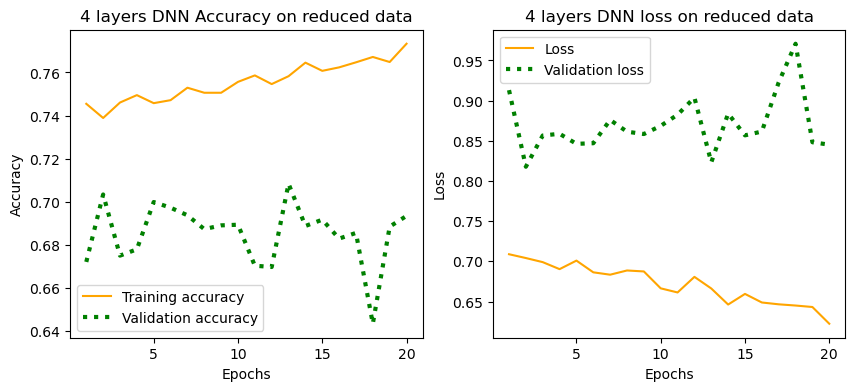

In [64]:
acc = history_class2.history['accuracy']
val_acc = history_class2.history['val_accuracy']

loss = history_class2.history['loss']
val_loss = history_class2.history['val_loss']

import matplotlib.pyplot as plt

figure = plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(np.arange(1,21,1), acc, color='orange', label='Training accuracy')
plt.plot(np.arange(1,21,1), val_acc, color='green', linestyle=':', lw=3, label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('4 layers DNN Accuracy on reduced data')
plt.legend()

plt.subplot(1,2,2)
plt.plot(np.arange(1,21,1), loss, color='orange', label='Loss')
plt.plot(np.arange(1,21,1), val_loss, color='green', linestyle=':', lw=3, label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('4 layers DNN loss on reduced data')
plt.legend()
;

In [ ]:
# sans l'étape de convolution au début, le modèle est très mal entraîné.